<a href="https://colab.research.google.com/github/vaishnavisadolkar/algorithm/blob/main/wainprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')
#set plot style
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/winequality_red.csv",sep=';')
data = df.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
data.shape


(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [8]:
def  map_quality(score):
 if score <5:
  return 'Low'
 elif 5 <= score<=6:
  return 'Medium'
 else:
  return 'High'

data ['quality_label']=data['quality'].apply(map_quality)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


value counts of each quality category:
quality_label
Medium    1319
High       217
Low         63
Name: count, dtype: int64


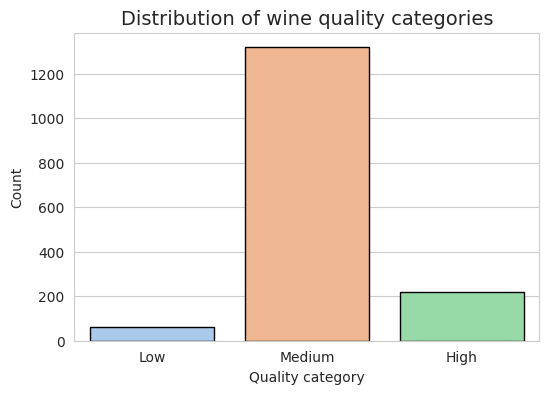

In [9]:
print("value counts of each quality category:")
print(data['quality_label'].value_counts())


plt.figure(figsize=(6,4))
sns.countplot(x='quality_label', data=data, palette= 'pastel',order=['Low','Medium','High'],edgecolor='black')
plt.title( 'Distribution of wine quality categories', fontsize=14)
plt.xlabel('Quality category')
plt.ylabel('Count')
plt.show()

In [10]:
data.drop(['quality'],axis=1,inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:

x = data.drop(['quality_label'],axis=1)
y = data['quality_label']
print(x.shape,y.shape)

(1599, 11) (1599,)


In [13]:
#splitting of data into train and test

x_train, x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
print("train shape:",x_train.shape)
print("test shape:",x_test.shape)

train shape: (1279, 11)
test shape: (320, 11)


Model Evalualtionn


In [14]:
#coustom Function: compute + plot confusion matrix
#and return classification matrics


def evaluate_model(y_true , y_pred , title ="Confusion Metrix"):
  cm = confusion_matrix(y_true,y_pred)

  plt.figure(figsize=(5,4))
  sns.heatmap(cm,annot=True,fmt="d",cbar=False)
  plt.title(title)
  plt.xlabel('predicted label')
  plt.ylabel('Actual')
  plt.show()


  return {

    "accuracy": accuracy_score(y_true, y_pred),
    "precision": precision_score(y_true, y_pred, average = 'weighted'),
    "recall":recall_score(y_true, y_pred,  average = 'weighted'),
    "f1_score": f1_score(y_true, y_pred,average='weighted'),
  }

In [15]:
# This cell previously contained an incorrect redefinition of evaluate_model. Its content has been removed.

In [16]:
#implement logistics Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

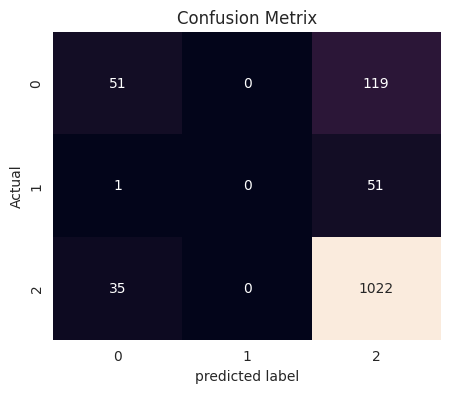

{'accuracy': 0.8389366692728695, 'precision': 0.7864804754640274, 'recall': 0.8389366692728695, 'f1_score': 0.8038495321886716}


In [17]:
y_train_pred = log_reg.predict (x_train)
train_metrics = evaluate_model(y_train, y_train_pred)
#y_tests_pred = log_reg.predict (x_test)
#test_metrics = evaluate_model(y_test, y_test_pred)
print(train_metrics)
#print(test_metrics)

Feature Selection

In [18]:
#correlation Analysis
#Heatmap correlation matrix

def plot_correlation_matrix(df):
  """
  Display correlation heatmap for numerical columns.
  Parameters:
  df(pd.DataFrame): Input dataframe
  """
  plt.figure(figsize=(12,10))
  corr = df.corr()

  sns.heatmap(corr, annot=True, fmt = ".2f",cmap= "coolwarm", cbar=True, square= True)
  plt.title("Correlation Heatmap", fontsize = 14)
  plt.show()

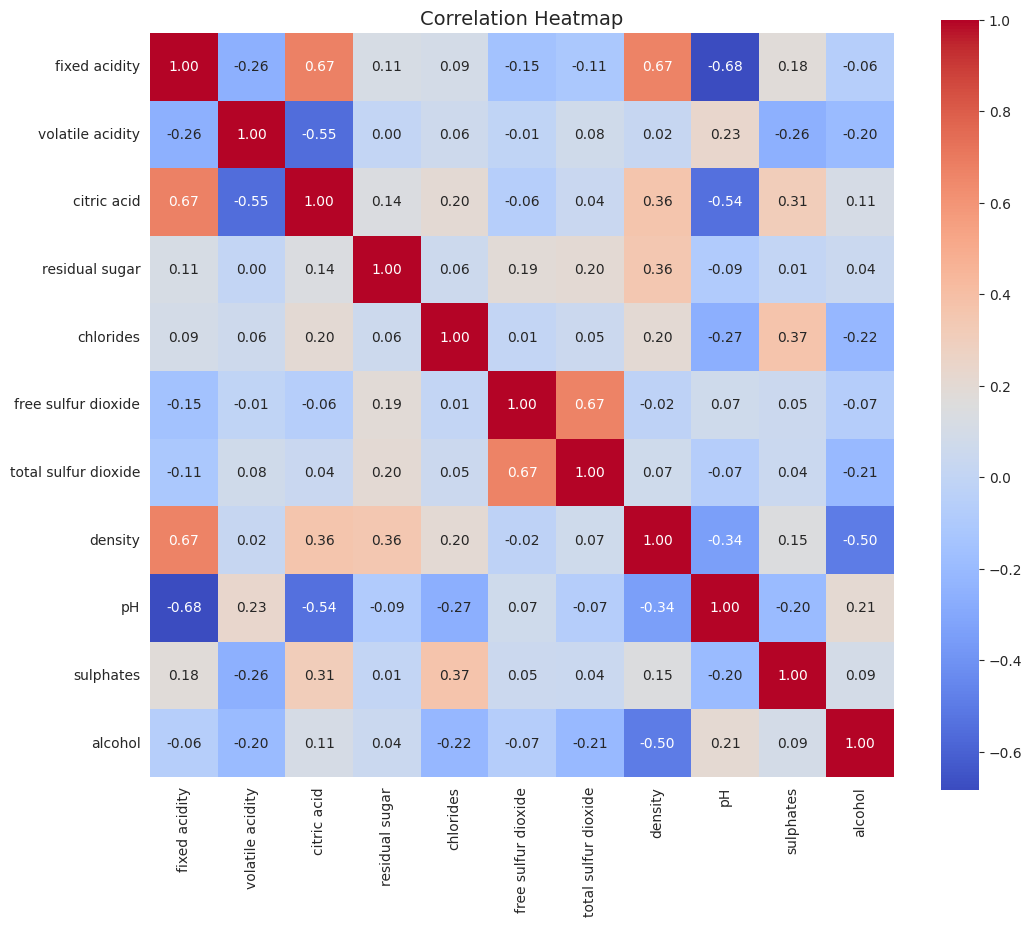

In [19]:

plot_correlation_matrix(x)

In [20]:
x_tain_new = x_train[['volatile acidity', 'citric acid','residual sugar','chlorides', 'total sulfur dioxide','density','pH', 'sulphates','alcohol']].copy()
x_test_new = x_test [['volatile acidity','citric acid', 'residual sugar','chlorides','total sulfur dioxide', 'density','pH', 'sulphates','alcohol']].copy()

In [21]:
x_test_new.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
803,0.56,0.08,2.50,0.114,46.0,0.9971,3.24,0.66,9.6
124,0.50,0.17,1.60,0.082,102.0,0.9960,3.39,0.48,9.5
350,0.67,0.22,2.70,0.107,34.0,1.0004,3.28,0.98,9.9
682,0.46,0.31,2.25,0.078,58.0,0.9980,3.33,0.54,9.8
1326,0.46,0.24,1.70,0.077,34.0,0.9948,3.39,0.60,10.6


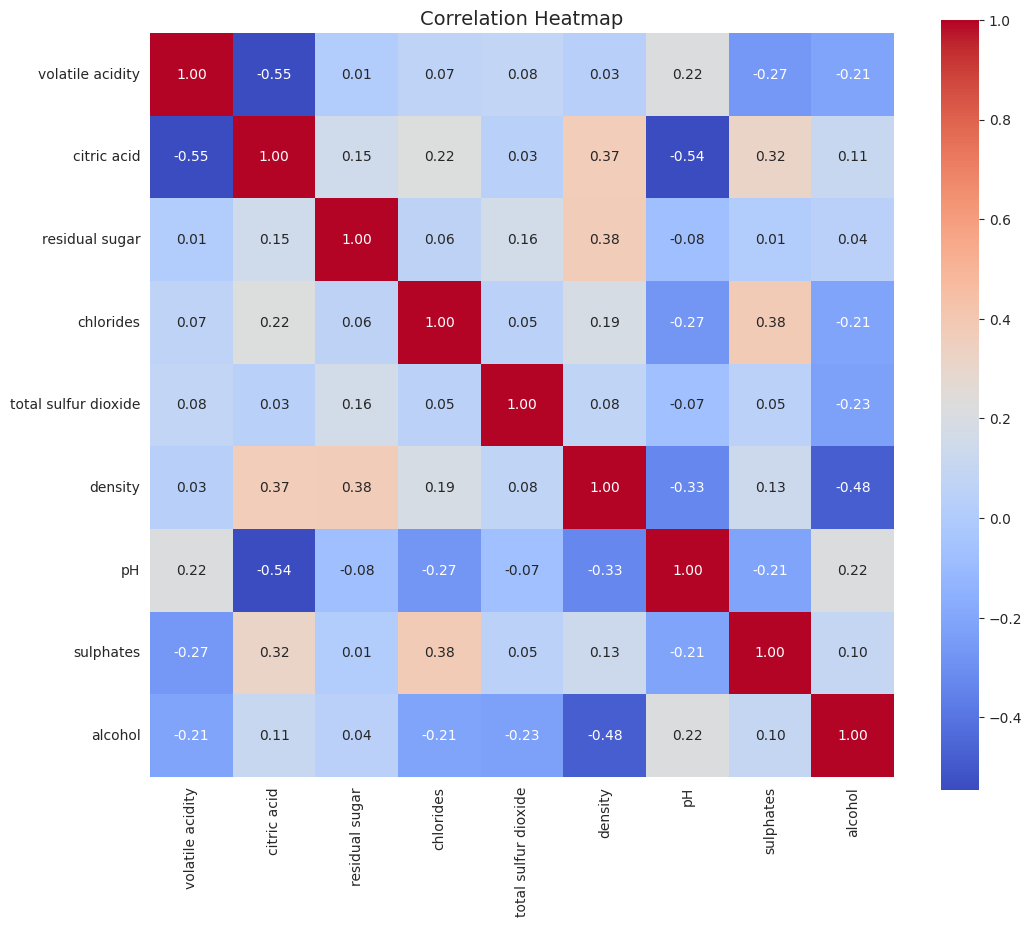

In [22]:
plot_correlation_matrix(x_tain_new)
plt.show()

In [23]:
log_reg_new = LogisticRegression()
log_reg_new.fit(x_train,y_train)

LogisticRegression()

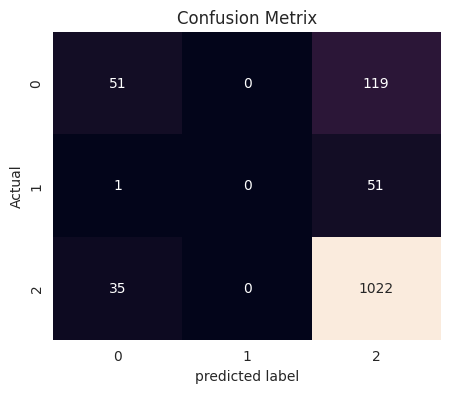

{'accuracy': 0.8389366692728695, 'precision': 0.7864804754640274, 'recall': 0.8389366692728695, 'f1_score': 0.8038495321886716}


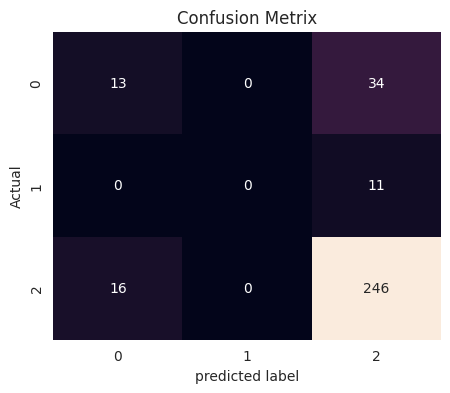

{'accuracy': 0.809375, 'precision': 0.7579796924991113, 'recall': 0.809375, 'f1_score': 0.7786825152279433}


In [24]:
y_train_pred = log_reg_new.predict (x_train)
train_metrics = evaluate_model(y_train, y_train_pred)
print(train_metrics)


y_test_pred = log_reg_new.predict (x_test)
test_metrics = evaluate_model(y_test, y_test_pred)
print(test_metrics)

In [25]:
df= DecisionTreeClassifier()
df.fit(x_train, y_train)


DecisionTreeClassifier()

In [26]:
important = df.feature_importances_
features = x_train.columns
indices = np.argsort(important)
for i in indices:
  print(features[i],":", important[i])


density : 0.035593752012076256
pH : 0.04692973357606002
fixed acidity : 0.04816800553735241
citric acid : 0.0487539850839112
residual sugar : 0.0809906550590743
volatile acidity : 0.09352239730754196
free sulfur dioxide : 0.10066588478141103
total sulfur dioxide : 0.1062458940041251
chlorides : 0.11995531492586942
sulphates : 0.14747011227258985
alcohol : 0.17170426543998843
